<a href="https://colab.research.google.com/github/iamkunalaggarwal/450_solutions/blob/main/vgg_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/marcusklasson/GroceryStoreDataset

Cloning into 'GroceryStoreDataset'...
remote: Enumerating objects: 6556, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 6556 (delta 44), reused 35 (delta 35), pack-reused 6293
Receiving objects: 100% (6556/6556), 116.25 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (274/274), done.
Checking out files: 100% (5717/5717), done.


In [2]:
## set train, validation, and test paths
train_path = 'dataset/train' 
validation_path = 'dataset/val'
test_path = 'dataset/test'

In [3]:
from keras.applications.vgg19 import VGG19
vgg_model = VGG19(weights = 'imagenet')

574726144/574710816 [==============================] - 6s 0us/step


In [4]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
from keras.models import Sequential
from keras.layers import Dense

vgg_transfer_base_model = Sequential()

for layer in vgg_model.layers[:-1]:
  vgg_transfer_base_model.add(layer)
  
vgg_transfer_base_model.layers.pop()
for layer in vgg_transfer_base_model.layers:
  layer.trainable=False

vgg_transfer_base_model.add(Dense(512, activation = 'relu'))
vgg_transfer_base_model.add(Dense(3, activation='softmax'))
vgg_transfer_base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
## data augmentation datagen
vgg_train_datagen_do = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

## test generator, required for prediction
vgg_test_datagen_do = ImageDataGenerator(rescale=1./255)

## train generator
vgg_train_generator_do = vgg_train_datagen_do.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=25,
        class_mode='categorical')

## validation generator
vgg_validation_generator_do = vgg_test_datagen_do.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

## compile model
vgg_transfer_base_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


## set steps per epoch for train
train_filenames_do = vgg_train_generator_do.filenames
steps_train_do = len(train_filenames_do)/vgg_train_generator_do.batch_size

## set steps per epoch for validation
validation_filenames_do = vgg_validation_generator_do.filenames
steps_valid_do = len(validation_filenames_do)/vgg_validation_generator_do.batch_size

## fit model
vgg_base_fit_generator_do = vgg_transfer_base_model.fit_generator(
        vgg_train_generator_do,
        steps_per_epoch=steps_train_do,
        epochs=10,
        validation_data=vgg_validation_generator_do,
        validation_steps=steps_valid_do,
        verbose=1)

Found 2640 images belonging to 3 classes.
Found 296 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
105/105 [==============================] - 70s 542ms/step - loss: 0.6336 - acc: 0.7337 - val_loss: 0.5834 - val_acc: 0.7500
Epoch 2/10
105/105 [==============================] - 53s 497ms/step - loss: 0.4645 - acc: 0.7958 - val_loss: 0.3921 - val_acc: 0.8311
Epoch 3/10
105/105 [==============================] - 53s 500ms/step - loss: 0.4042 - acc: 0.8159 - val_loss: 0.3337 - val_acc: 0.8412
Epoch 4/10
105/105 [==============================] - 53s 499ms/step - loss: 0.3801 - acc: 0.8326 - val_loss: 0.3494 - val_acc: 0.8716
Epoch 5/10
105/105 [==============================] - 53s 498ms/step - loss: 0.3800 - acc: 0.8398 - val_loss: 0.3477 - val_acc: 0.8446
Epoch 6/10
105/105 [==============================] - 53s 498ms/step - loss: 0.3756 - acc: 0.8356 - val_loss: 0.3260 - val_acc: 0.9054
Epoch 7/10
105/105 [==============================] - 53s 497ms/step - loss: 0.3455 - acc: 0.8561 - val_loss: 0.3134 - val_acc: 0.8986
Epoch 8/10
105/105 [==============================] - 5

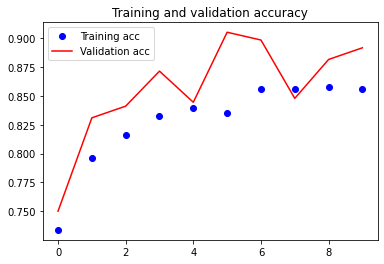

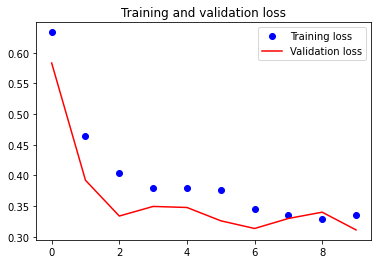

In [7]:
import matplotlib.pyplot as plt

acc = vgg_base_fit_generator_do.history['acc']
val_acc = vgg_base_fit_generator_do.history['val_acc']
loss = vgg_base_fit_generator_do.history['loss']
val_loss = vgg_base_fit_generator_do.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'r')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'r')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
vgg_test_generator_do = vgg_test_datagen_do.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=1,
        shuffle = False,
        class_mode='categorical')

filenames_do = vgg_test_generator_do.filenames
nb_samples_do = len(filenames_do)

predict_do = vgg_transfer_base_model.predict_generator(vgg_test_generator_do,steps = nb_samples_do, verbose=2)

Found 2485 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


2485/2485 - 106s - 106s/epoch - 43ms/step
